# SPRINT 3.  MARKETING


## 1. IMPORTACIÓN BBDD I CREACIÓN DEL DF

In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.
Taula 'BANK_marketing211024' carregada correctament.
Taula 'BANK_marketing_backup_211024' carregada correctament.


In [2]:
df_marketing=df['BANK_marketing211024']

df_marketing=df_marketing.drop(['housing','default','loan','job','marital','education'],axis=1)
df_marketing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26163 entries, 0 to 26162
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26163 non-null  int64 
 1   age       26163 non-null  int64 
 2   balance   26163 non-null  int64 
 3   contact   26163 non-null  object
 4   day       26163 non-null  int64 
 5   month     26163 non-null  object
 6   duration  26163 non-null  int64 
 7   campaign  26163 non-null  int64 
 8   pdays     26163 non-null  int64 
 9   previous  26163 non-null  int64 
 10  poutcome  26163 non-null  object
 11  deposit   26163 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.4+ MB


## 1.1 Parametros globales de visualización matplotlib seaborn

In [3]:
plt.style.use("seaborn-v0_8-deep")

# Configuración de parámetros globales para Matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'legend.loc': 'upper right'
})

# Configuración de estilo y contexto de Seaborn
#sns.set(style="whitegrid")  # Estilo del gráfico
sns.set_context("notebook", font_scale=1.2, rc={
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 12 
})


## 2. EDA

In [4]:
df_marketing.head()

,id,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,2343,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,2343,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,45,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,1270,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,2476,unknown,5,may,579,1,-1,0,unknown,1


In [5]:
filtro=df_marketing['pdays']!=-1


Text(0.5, 0, 'Dias entre llamadas')

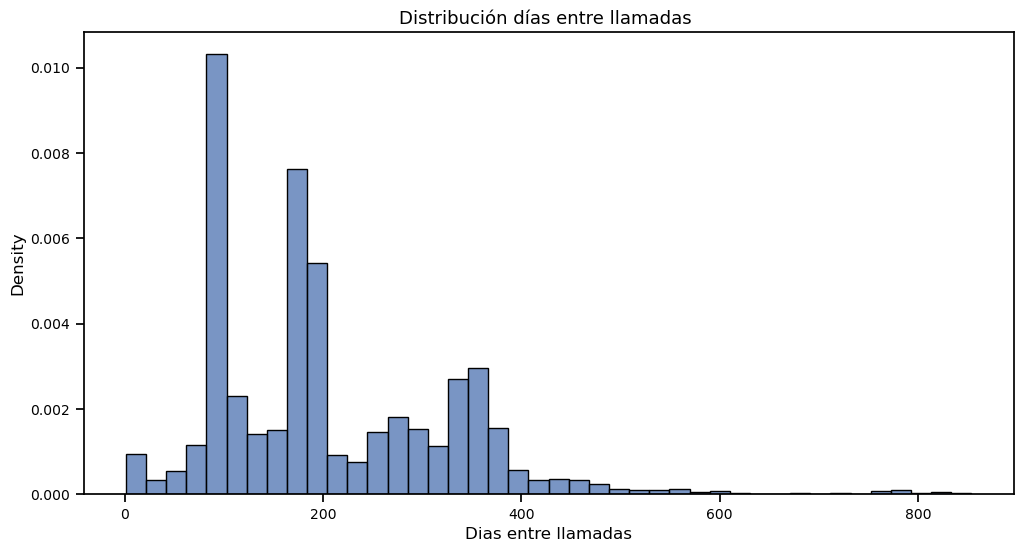

In [6]:
#Ahora a generar una matriz de 2x2 subplots, se accede a cada uno por axs[i,j]
#fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Utilizar displot no permite utilizar subplot. Bueno recordarlo.
#sns.displot(data=df_marketing,x="duration", kde=False, ax=axs[0], stat='density')
# Graficamos el histograma con seaborn displot
axs=sns.histplot(data=df_marketing[filtro], x="pdays", kde=False,  stat='density')
axs.set_title('Distribución días entre llamadas ')
axs.set_xlabel('Dias entre llamadas')
#axs.set_xlim(0, 450)
#axs.set_ylim(0, 0.02)


Text(0.5, 0, 'Dias entre llamadas')

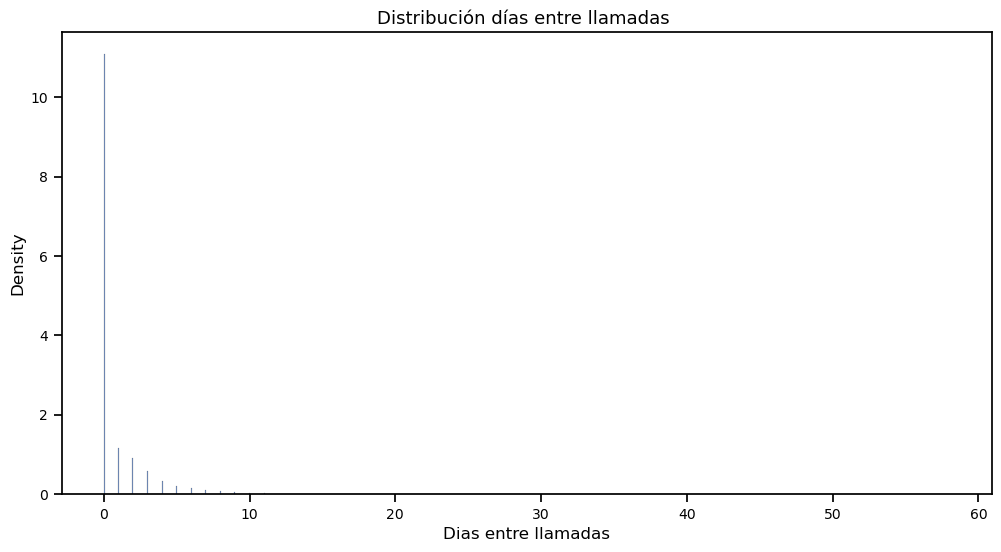

In [7]:
axs=sns.histplot(data=df_marketing, x="previous", kde=False,  stat='density')
axs.set_title('Distribución días entre llamadas ')
axs.set_xlabel('Dias entre llamadas')
#axs.set_xlim(0, 450)
#axs.set_ylim(0, 0.02)


## 3. ANÁLISIS 

### 3.1 Funciones

In [8]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

def clasification_variable_x_cuartiles(valor):
    
    if  valor < min_Q_ext:
        return ("extremo-muy-bajo inf a "+str(round(min_Q_ext,0))) 
    elif valor < min_Q:
        return ("muy-bajo "+str(round(min_Q_ext,0))+" a "+str(round(min_Q,0)))
    elif valor < Q1:
        return ("bajo "+str(round(min_Q,0))+" a "+str(round(Q1,0)))
    elif valor < Q2:
        return ("medio-bajo "+str(round(Q1,0))+" a "+str(round(Q2,0)))
    elif valor < Q3:
        return ("medio-alto "+str(round(Q2,0))+" a "+str(round(Q3,0)))
    elif valor < max_Q:
        return ("alto "+str(round(Q3,0))+" a "+str(round(max_Q,0)))
    elif valor < max_Q_ext:
        return ("muy-alto "+str(round(max_Q,0))+" a "+str(round(max_Q_ext,0)))
    else:
        return ("extremo-muy-alto "+str(round(max_Q_ext,0))+" a inf")



In [9]:
def num_semana_mes (day):

    semana_mes=-1

    if (day>=1 and day <=7):
        semana_mes=1
    elif (day>7 and day <=15):
        semana_mes=2
    elif (day>15 and day <=23):
        semana_mes=3
    elif (day>23 and day <=31):
        semana_mes=4
    else:
        semana_mes=0
    return semana_mes

df_marketing["semana_mes"]=df_marketing["day"].apply(num_semana_mes)




In [10]:
def cuartil_33_y_66(df):
    #calcular cuartiles
    Q33 = df.quantile(0.33)
    Q66 = df.quantile(0.66)
       
    return Q33, Q66

def clasificacion_variable_x_cuartil_33_y_66(valor):
    
    if  valor  <Q33:
        return ("bajo infer a "+str(round(Q33,0))) 
    elif valor <Q66:
        return ("medio "+str(round(Q33,0))+" a "+str(round(Q66,0)))
    else:
        return ("alto super a "+str(round(Q66,0)))

Creación de nuevas variables en el dataset

In [11]:
df_marketing["duration_min"]=round(df_marketing["duration"]/60,2)

Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_marketing['duration_min'])

Q1=round(Q1,1)
Q2=round(Q2,1)
Q3=round(Q3,1)
min_Q=round(min_Q,1)
min_Q_ext=round(min_Q_ext,1)
max_Q=round(max_Q,1)
max_Q_ext=round(max_Q_ext,1)
df_marketing["rango_duration"] = df_marketing["duration_min"].apply(clasification_variable_x_cuartiles)


In [12]:
df_marketing["rango_duration"].value_counts()

medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: rango_duration, dtype: int64

In [13]:
Q33, Q66 = cuartil_33_y_66(df_marketing['age'])
df_marketing["categoria_age"] = df_marketing["age"].apply(clasificacion_variable_x_cuartil_33_y_66)
Q33, Q66 = cuartil_33_y_66(df_marketing['balance'])
df_marketing["categoria_balance"] = df_marketing["balance"].apply(clasificacion_variable_x_cuartil_33_y_66)



In [14]:
df_marketing["categoria_age"].value_counts()

alto super a 45.0    9109
medio 34.0 a 45.0    8980
bajo infer a 34.0    8074
Name: categoria_age, dtype: int64

In [15]:
Q33, Q66 = cuartil_33_y_66(df_marketing['previous'])
Q33, Q66 

(0.0, 0.0)

In [16]:
df_marketing["categoria_balance"].value_counts()

alto super a 1114.0     8896
medio 231.0 a 1114.0    8639
bajo infer a 231.0      8628
Name: categoria_balance, dtype: int64

In [17]:
df_marketing["campaign"].value_counts()

1     11224
2      7169
3      3098
4      1812
5       861
6       592
7       307
8       291
9       179
10      114
11       98
13       80
12       71
14       38
17       36
15       29
18       22
16       22
21       16
20       13
19       13
30       12
22       10
26       10
25        8
24        7
23        6
32        5
29        5
63        4
33        3
28        2
41        2
43        2
27        1
31        1
Name: campaign, dtype: int64

In [18]:
df_marketing["semana_mes"].value_counts()

3    7667
2    7353
1    5795
4    5348
Name: semana_mes, dtype: int64

In [19]:
df_marketing["previous"].value_counts()

0     19525
1      2070
2      1607
3      1027
4       579
5       380
6       288
7       176
8       151
9        78
10       66
11       56
12       30
17       25
13       21
15       12
19       11
14       10
20        7
23        6
27        4
26        4
22        4
16        4
21        3
30        3
40        3
28        2
18        2
58        2
41        2
55        2
29        2
37        1
Name: previous, dtype: int64

In [20]:
#filtro_year = df_marketing['year'].isin(["2008", "2009", "2010"])
df_groupby_semana_mes_tasa_conv = df_marketing.groupby(["semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_semana_mes_tasa_conv=df_groupby_semana_mes_tasa_conv.reset_index()
df_groupby_semana_mes_tasa_conv=df_groupby_semana_mes_tasa_conv.rename(columns={"mean":"tasa_conversion","count":"num_registros"})
df_groupby_semana_mes_tasa_conv

,semana_mes,tasa_conversion,num_registros
0,1,0.503365,5795
1,2,0.511220,7353
2,3,0.430807,7667
3,4,0.450823,5348


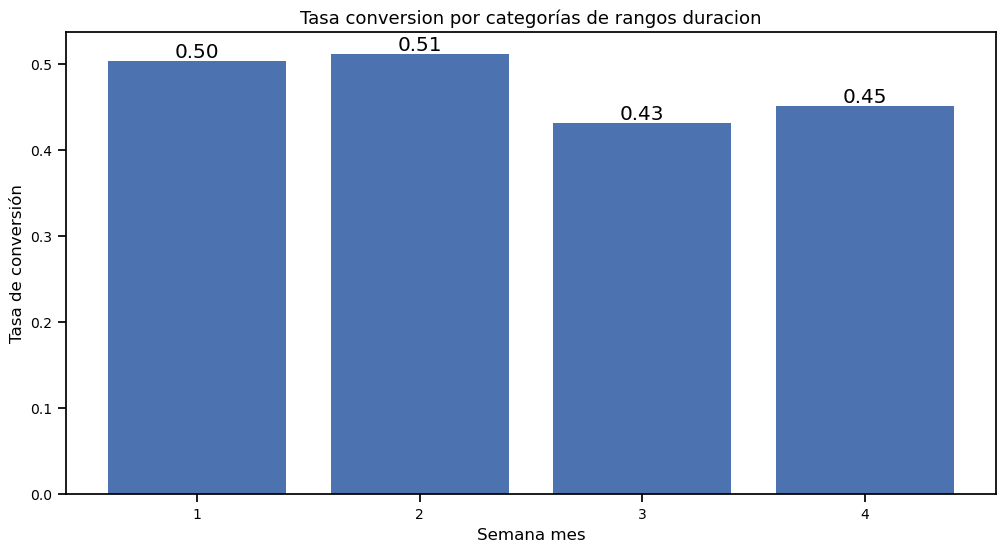

In [21]:
fig, ax = plt.subplots()
bars=ax.bar(df_groupby_semana_mes_tasa_conv ['semana_mes'],df_groupby_semana_mes_tasa_conv ['tasa_conversion'])
# Añadir títulos y etiquetas
#plt.xticks(rotation=45)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Semana mes")
plt.ylabel("Tasa de conversión")
ax.set_xticks([1,2,3,4])

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

Graficar el número de semana per rangos de duración sin outliers, extremo-muy-alto y muy-alto en duraciones

In [22]:
is_rango_duration_extremo_alto=df_marketing["rango_duration"]=="extremo-muy-alto 26.0 a inf"
is_rango_duration_muy_alto=df_marketing["rango_duration"]=="muy-alto 17.0 a 26.0"

fitro_duracion_no_extremo_alto_ni_muy_alto= ~((is_rango_duration_extremo_alto | is_rango_duration_muy_alto))


df_groupby_rango_duration_semana_mes=df_marketing[fitro_duracion_no_extremo_alto_ni_muy_alto].groupby(["rango_duration","semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.reset_index()
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.rename(columns={'mean':'tasa_conversión','count':'num_total_registros'})


In [23]:
df_marketing["rango_duration"].value_counts()

medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: rango_duration, dtype: int64

In [24]:
df_groupby_rango_duration_semana_mes


,rango_duration,semana_mes,tasa_conversión,num_total_registros
0,alto 8.0 a 17.0,1,0.800373,1072
1,alto 8.0 a 17.0,2,0.827632,1491
2,alto 8.0 a 17.0,3,0.783117,1540
3,alto 8.0 a 17.0,4,0.801518,922
4,bajo -7.0 a 2.0,1,0.126378,1179
5,bajo -7.0 a 2.0,2,0.152275,1714
6,bajo -7.0 a 2.0,3,0.083210,2031
7,bajo -7.0 a 2.0,4,0.102108,1518
8,medio-alto 4.0 a 8.0,1,0.579040,1708
9,medio-alto 4.0 a 8.0,2,0.580797,1906


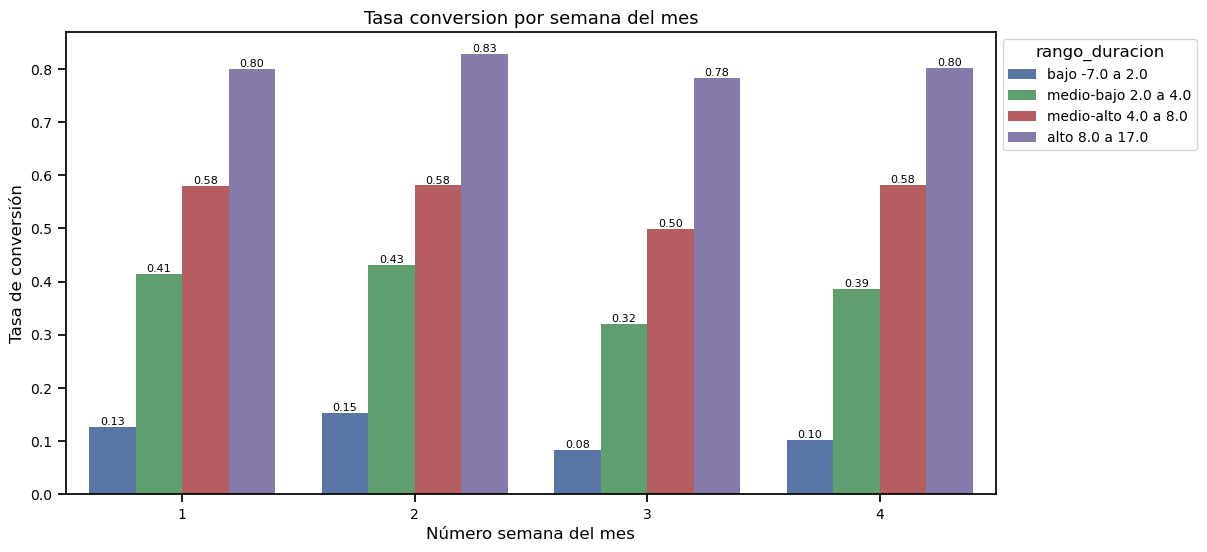

In [25]:
order=[1,2,3,4]
hue_order = [ 'bajo -7.0 a 2.0', 'medio-bajo 2.0 a 4.0','medio-alto 4.0 a 8.0','alto 8.0 a 17.0']
#hue_order=['bajo infer a 34.0','medio 34.0 a 45.0', 'alto super a 45.0']
ax=sns.barplot(x='semana_mes',y='tasa_conversión',data=df_groupby_rango_duration_semana_mes,hue='rango_duration', order=order,hue_order=hue_order)

#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por semana del mes")
plt.xlabel("Número semana del mes")
plt.ylabel("Tasa de conversión")


# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge',fontsize=8)
    
# Obtener los handles y labels de la leyenda original
handles, labels = ax.get_legend_handles_labels()

# Crear nueva leyenda con etiquetas mapeadas
#new_labels = [label_map[label] for label in labels]
ax.legend(handles=handles, title='rango_duracion', loc='upper left',bbox_to_anchor=(1, 1))

# Mostrar gráfico
plt.show()

In [26]:
df_marketing["rango_duration"].value_counts()

medio-alto 4.0 a 8.0           6729
medio-bajo 2.0 a 4.0           6464
bajo -7.0 a 2.0                6442
alto 8.0 a 17.0                5025
muy-alto 17.0 a 26.0           1258
extremo-muy-alto 26.0 a inf     245
Name: rango_duration, dtype: int64

In [27]:
is_rango_duration_medio_bajo=df_marketing["rango_duration"]=="medio-bajo 2.0 a 4.0"
is_rango_duration_medio_alto=df_marketing["rango_duration"]=="medio-alto 4.0 a 8.0"
is_rango_duration_alto=df_marketing["rango_duration"]=="alto 8.0 a 17.0 "

fitro_duracion_medio_bajo_medio_alto_alto= (is_rango_duration_medio_bajo & is_rango_duration_medio_alto & is_rango_duration_alto)


df_groupby_rango_duration_semana_mes=df_marketing[fitro_duracion_medio_bajo_medio_alto_alto].groupby(["categoria_balance","semana_mes"])["deposit"].agg(['mean','count'])
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.reset_index()
df_groupby_rango_duration_semana_mes=df_groupby_rango_duration_semana_mes.rename(columns={'mean':'tasa_conversión','count':'num_total_registros'})


# Duración media de las llamadas por semana del mes (en minutos)

   semana_mes  duration_minutos
0           1          6.272269
1           2          6.274711
2           3          6.384272
3           4          5.682430


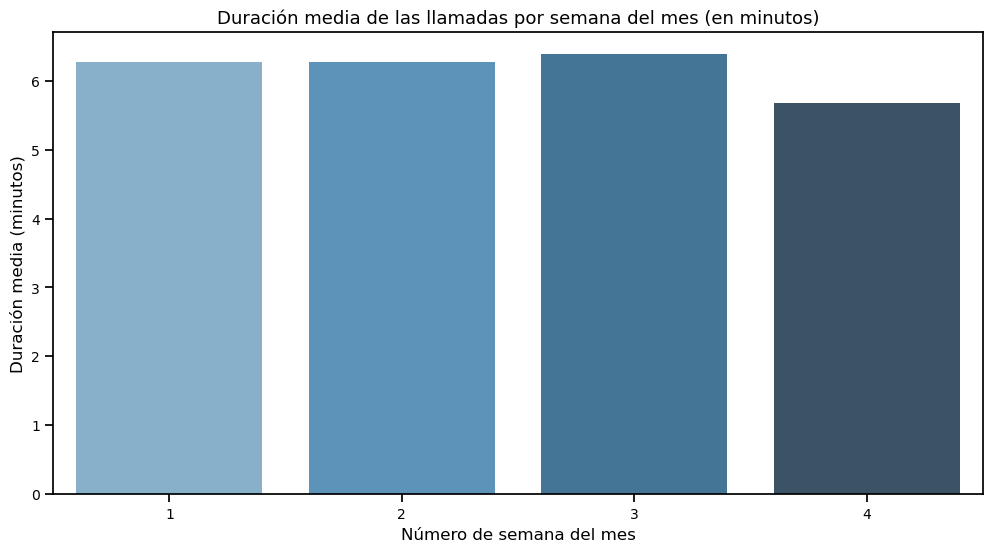

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Convertir la duración de segundos a minutos
df_marketing['duration_minutos'] = df_marketing['duration'] / 60

# Agrupar por semana del mes y calcular la media de duración en minutos
df_duracion_media = df_marketing.groupby('semana_mes')['duration_minutos'].mean().reset_index()

# Mostrar los resultados en una tabla
print(df_duracion_media)

# Gráfico de barras de la duración media en minutos por semana del mes
sns.barplot(x='semana_mes', y='duration_minutos', data=df_duracion_media, palette='Blues_d')
plt.title("Duración media de las llamadas por semana del mes (en minutos)")
plt.xlabel("Número de semana del mes")
plt.ylabel("Duración media (minutos)")
plt.show()


## 1. Duración Estable en las Semanas 1 a 3:

    Las semanas 1, 2 y 3 tienen duraciones medias de llamadas muy similares, alrededor de 6 minutos. Esto sugiere que durante estas semanas no hay grandes variaciones en la duración media de las llamadas.
    Este comportamiento estable podría indicar que las estrategias de contacto o el comportamiento de los usuarios no varían demasiado en estas semanas. Podría ser que el equipo de ventas o marketing mantenga una constancia en la forma de abordar las llamadas en estas semanas.

## 2. Disminución en la Semana 4:

    La semana 4 muestra una caída notable en la duración media de las llamadas, bajando a menos de 6 minutos. Esta es la única semana que muestra una desviación significativa.
    Posibles explicaciones:
        Factores operativos: Podría haber factores internos, como cambios en las estrategias de contacto, menor dedicación del equipo, o campañas diferentes, que resulten en llamadas más cortas en la última semana.
        Comportamiento del cliente: Es posible que los clientes tiendan a responder menos o tener interacciones más breves a medida que se acerca el final del mes, quizás debido a cambios en sus prioridades financieras o laborales.
        Campañas diferentes: Si diferentes campañas o métodos de contacto se implementan en diferentes semanas, podría haber diferencias en cómo los clientes responden y en la duración de esas respuestas.

## 3. Potencial Impacto en la Conversión:

    Si observas que la tasa de conversión también cae en la semana 4 (como parece ser una tendencia según gráficos anteriores), esta disminución en la duración de las llamadas podría ser un factor clave. Llamadas más cortas podrían indicar menor tiempo para interactuar o convencer al cliente, lo que podría explicar tasas de conversión más bajas en esa semana.

## 4. Posibles Estrategias de Mejora:

    Revisar la estrategia en la semana 4: Dado que la duración media cae notablemente en esta semana, podría ser útil investigar qué factores están influyendo en la caída. ¿Es la carga de trabajo del equipo de ventas diferente en esa semana? ¿Cambian las campañas o la forma en que se abordan las llamadas? ¿Se están asignando menos recursos a las interacciones?
    Analizar la satisfacción del cliente: Las llamadas más cortas en la semana 4 también podrían ser un indicador de que los clientes están menos dispuestos a interactuar o están recibiendo menos valor en ese momento. Sería útil investigar si los clientes están menos comprometidos en esta semana o si los recursos de marketing podrían ajustarse.

## Conclusión:

La duración media estable en las primeras tres semanas indica consistencia en las interacciones, mientras que la caída en la duración en la semana 4 podría estar relacionada con factores internos (estrategia, carga de trabajo) o externos (cambios en la disposición del cliente). Sería útil investigar más a fondo la semana 4 para entender las razones detrás de las llamadas más cortas y si esto tiene un impacto negativo en las conversiones.

## Campañas cerradas por semana del mes

   semana_mes  campaign
0           1      2917
1           2      3759
2           3      3303
3           4      2411


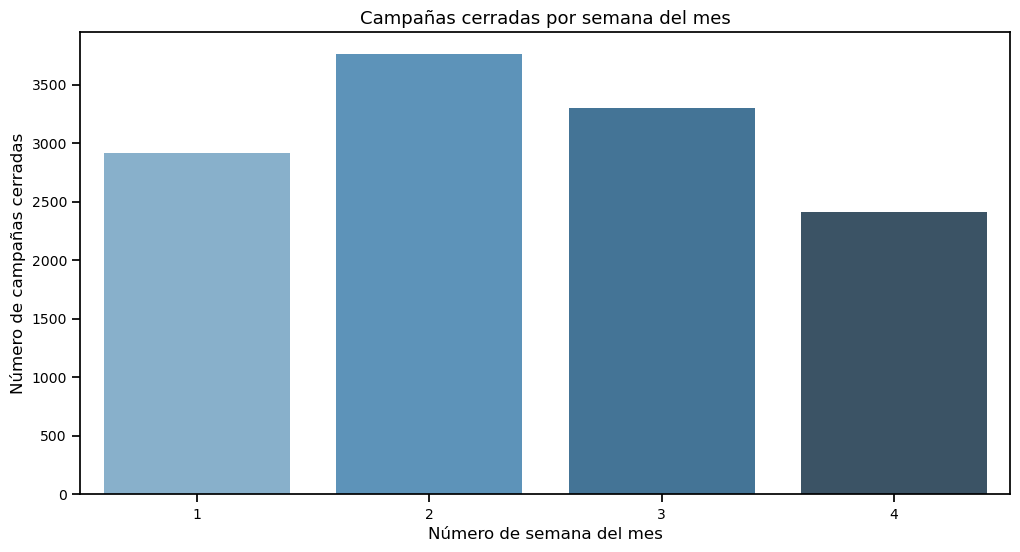

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Agrupar por semana del mes y contar cuántas campañas se cerraron (considerando que 'deposit' == 1)
df_campanas_cerradas = df_marketing[df_marketing['deposit'] == 1].groupby('semana_mes')['campaign'].count().reset_index()

# Mostrar los resultados en una tabla
print(df_campanas_cerradas)

# Gráfico de barras de campañas cerradas por semana
sns.barplot(x='semana_mes', y='campaign', data=df_campanas_cerradas, palette='Blues_d')
plt.title("Campañas cerradas por semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de campañas cerradas")
plt.show()


## 1. Mayor Cantidad de Campañas Cerradas en la Semana 2:

    La semana 2 muestra el mayor número de campañas cerradas, con un pico significativo en comparación con las otras semanas.
    Posibles explicaciones:
        Podría haber una estrategia de marketing o ventas más efectiva implementada durante la segunda semana del mes.
        Esta semana podría coincidir con momentos clave, como días de pago o períodos en los que los clientes están más dispuestos a completar conversiones.

## 2. Semana 4 con Menos Campañas Cerradas:

    La semana 4 muestra la menor cantidad de campañas cerradas en comparación con las otras semanas.
    Esto podría estar relacionado con el descenso que también observamos en la duración media de las llamadas en esa misma semana. Es posible que las interacciones sean más cortas y menos efectivas, lo que contribuye a una menor tasa de éxito en cerrar campañas.
    Además, podrían influir factores externos, como menor disposición de los clientes a finales de mes, o cambios en la estrategia de contacto en esta semana.

## 3. Semanas 1 y 3 con Comportamiento Similar:

    Las semanas 1 y 3 tienen un comportamiento bastante similar en cuanto al número de campañas cerradas, aunque ambas están por debajo del pico de la semana 2.
    Esto podría indicar que las estrategias o circunstancias en estas semanas son consistentes, pero menos efectivas que en la semana 2. Sería interesante analizar si hay algo que podría mejorarse en estas semanas para aumentar las conversiones.

## 4. Patrón de Desgaste hacia el Final del Mes:

    El gráfico sugiere un patrón de desgaste a medida que avanzan las semanas. Después de un pico en la semana 2, el número de campañas cerradas disminuye gradualmente en las semanas 3 y 4.
    Posibles factores:
        Es posible que los equipos de ventas/marketing estén más activos o centrados en la primera mitad del mes, y que el impulso se pierda a medida que el mes avanza.
        También podría ser que los clientes estén más receptivos en las primeras semanas, pero su disponibilidad o interés disminuya hacia el final del mes.

## 5. Posibles Estrategias de Mejora:

    Reforzar la estrategia en la semana 4: Dado que la semana 4 muestra una caída considerable, podría ser útil revisar qué está sucediendo en términos de tácticas de ventas o marketing en ese período. Reforzar la estrategia o ajustar los esfuerzos podría mejorar los resultados.
    Replicar el éxito de la semana 2: Analizar qué se hizo de diferente en la semana 2 podría ayudar a replicar ese éxito en las demás semanas. Esto podría incluir revisar las campañas, los mensajes enviados o incluso los días específicos en los que se hicieron los contactos.

## Conclusión:

La semana 2 parece ser la más exitosa en términos de campañas cerradas, mientras que la semana 4 muestra un bajo rendimiento. Este patrón de caída progresiva podría estar relacionado con cambios en las estrategias internas, la disposición del cliente, o factores externos a lo largo del mes. Sería interesante profundizar en qué estrategias se implementan durante la semana 2 para replicarlas, y analizar en mayor detalle qué afecta la caída en la semana 4.

# Impacto del tipo de contacto por semana del mes

   semana_mes    contact  counts
0           1   cellular    4123
1           1  telephone     407
2           2   cellular    5413
3           2  telephone     561
4           3   cellular    5476
5           3  telephone     473
6           4   cellular    3818
7           4  telephone     437


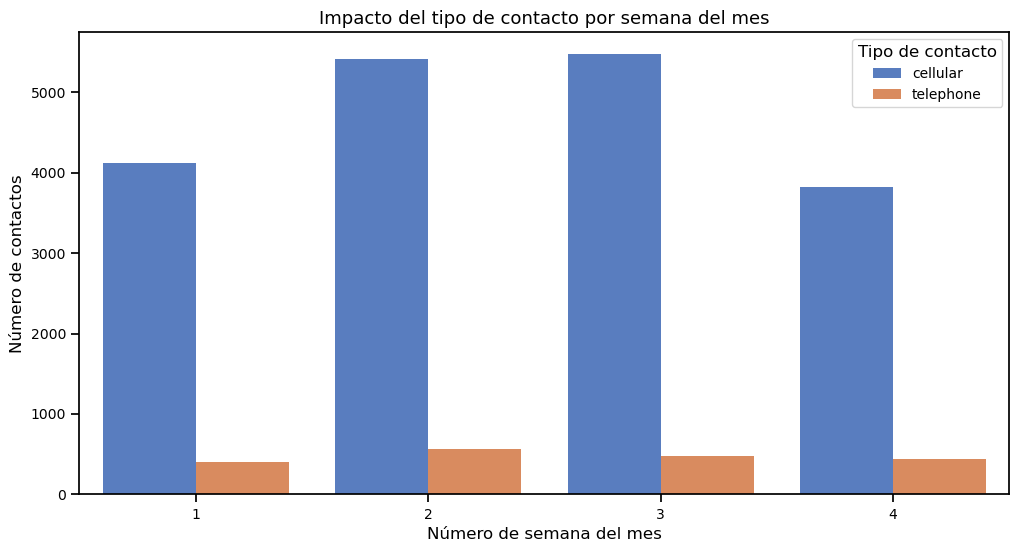

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Filtrar los registros donde 'contact' no sea "unknown"
df_filtered = df_marketing[df_marketing['contact'] != 'unknown']

# Agrupar por semana del mes y tipo de contacto, y contar el número de contactos
df_contact_week = df_filtered.groupby(['semana_mes', 'contact']).size().reset_index(name='counts')

# Mostrar los resultados en una tabla
print(df_contact_week)

# Crear un gráfico de barras para visualizar el impacto del tipo de contacto por semana del mes
sns.barplot(x='semana_mes', y='counts', hue='contact', data=df_contact_week, palette='muted')
plt.title("Impacto del tipo de contacto por semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de contactos")
plt.legend(title="Tipo de contacto")
plt.show()


## 1. Dominio del Contacto por Celular:

    El contacto a través de celular (barras azules) domina ampliamente en todas las semanas. Este tipo de contacto supera significativamente al teléfono fijo en cada una de las semanas.
    Esto sugiere que, en términos de preferencia o éxito, el contacto a través de celular es mucho más frecuente. Es posible que los clientes respondan mejor o que haya una mayor predisposición para utilizar celulares en lugar de teléfonos fijos en las campañas de esta base de datos.

## 2. Pico de Contactos en la Semana 3:

    La semana 3 muestra el mayor número de contactos realizados a través de celular, superando los 5,000. Esto indica que en esta semana se realizaron más esfuerzos o se alcanzó a más clientes mediante este canal.
    Podría ser interesante investigar si esta mayor cantidad de contactos por celular en la semana 3 tuvo un impacto positivo en las conversiones (como un aumento en campañas cerradas) o si es simplemente un reflejo de una mayor actividad.

## 3. Teléfono Fijo con Uso Constante, pero Bajo:

    El uso del teléfono fijo (barras naranjas) es constante pero significativamente bajo en comparación con el celular en todas las semanas.
    Aunque el teléfono fijo sigue siendo usado, su impacto en términos de volumen es mínimo. Esto sugiere que podría no ser el canal más efectivo, o bien que se utiliza para un segmento específico de clientes que prefieren este medio.

## 4. Semana 4 con Menor Actividad:

    La semana 4 muestra una disminución en el número de contactos tanto por celular como por teléfono fijo. Esta disminución coincide con las observaciones previas sobre la caída en la duración de las llamadas y las campañas cerradas en la última semana del mes.
    Sería interesante analizar si esta menor cantidad de contactos en la semana 4 está relacionada con menos esfuerzos por parte del equipo de ventas o marketing, o si es una respuesta a una menor disposición de los clientes a interactuar en esa semana.

## 5. Variación entre Semanas:

    En las semanas 1, 2 y 3, el número de contactos se mantiene relativamente alto, con picos en las semanas 2 y 3. Esto podría reflejar una estrategia más activa en la primera mitad del mes, mientras que la semana 4 podría coincidir con una reducción de la actividad o del interés de los clientes.

## Posibles Estrategias:

    Optimizar el Contacto por Celular: Dado que el celular es claramente el canal dominante, sería útil profundizar en cómo se están utilizando las estrategias para este tipo de contacto y ver si hay áreas de mejora. Además, podrías investigar cómo mejorar el uso del celular en la semana 4, donde se observa una caída.

    Revisar la Estrategia para la Semana 4: La semana 4 sigue mostrando un menor número de contactos, lo que también puede estar contribuyendo a las menores tasas de conversión observadas previamente. Un análisis más profundo de las campañas y tácticas de contacto en esa semana podría ayudar a mejorar el rendimiento.

    Segmentar Mejor el Uso del Teléfono Fijo: Aunque el teléfono fijo tiene un uso bajo, es posible que aún sea valioso para un segmento específico de clientes. Sería útil identificar si hay patrones demográficos o de comportamiento que justifiquen mantener este tipo de contacto y ajustarlo para mejorar su efectividad.

## Conclusión:

El contacto por celular es claramente el canal preferido y más efectivo a lo largo de todas las semanas, especialmente en la semana 3. El teléfono fijo tiene una presencia constante pero mínima, lo que sugiere que puede no ser tan efectivo o que se utiliza para casos específicos. Finalmente, la semana 4 sigue mostrando una disminución en el número de contactos, lo que sugiere que puede haber una oportunidad de mejorar la estrategia en esa semana para aumentar las conversiones.

# Media del balance de los clientes por semana del mes

   semana_mes      balance
0           1  1397.228645
1           2  1557.447300
2           3  1669.026608
3           4  1397.989342


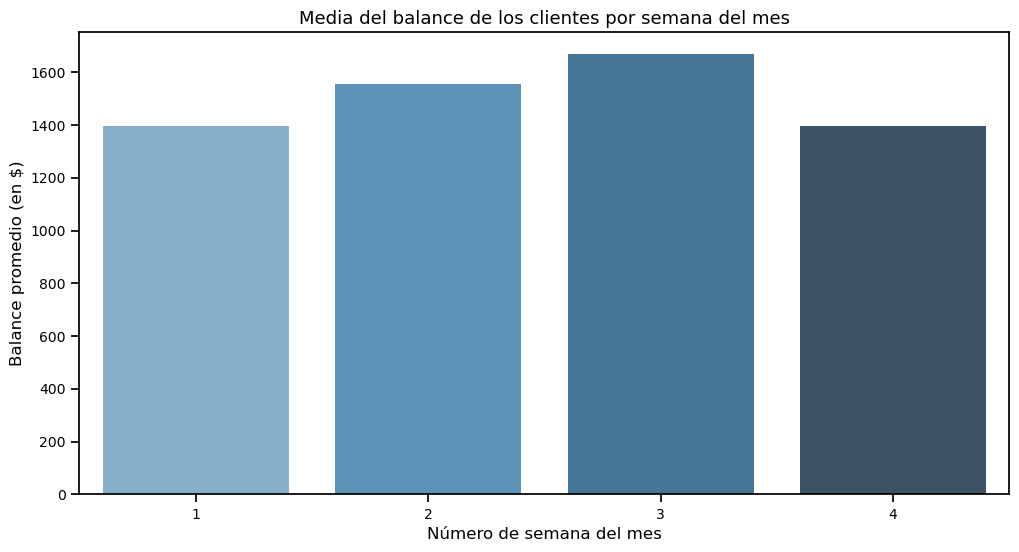

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Agrupar por semana del mes y calcular la media del balance
df_balance_media = df_marketing.groupby('semana_mes')['balance'].mean().reset_index()

# Mostrar los resultados en una tabla
print(df_balance_media)

# Crear un gráfico de barras para visualizar la media del balance por semana del mes
sns.barplot(x='semana_mes', y='balance', data=df_balance_media, palette='Blues_d')
plt.title("Media del balance de los clientes por semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Balance promedio (en $)")
plt.show()


   ## Pico del Balance en la Semana 3:
        El balance promedio de los clientes alcanza su valor más alto en la semana 3, superando los 1,600 dólares. Esto sugiere que, durante esta semana, los clientes con balances más altos son más activos.
        Posible Explicación: Esto podría estar relacionado con el comportamiento financiero de los clientes, donde a mediados de mes los clientes tienen más disponibilidad de fondos o estabilidad financiera. También podría coincidir con pagos de salarios o momentos de mayor capacidad adquisitiva.

  ## Semanas 1 y 4 con Balances Más Bajos:
        Tanto la semana 1 como la semana 4 tienen balances más bajos en comparación con las semanas 2 y 3. En la semana 4, el balance promedio baja notablemente por debajo de 1,400 dólares.
        Semana 1: Esto podría reflejar que al comienzo del mes, los clientes aún no han realizado ingresos o los gastos del final del mes anterior afectan su balance.
        Semana 4: La caída en el balance de la semana 4 podría deberse a gastos acumulados a lo largo del mes, dejando a los clientes con menos fondos disponibles. Este comportamiento podría influir negativamente en las conversiones, ya que los clientes con menos fondos pueden estar menos dispuestos a hacer depósitos o compras.

  ##  Balance Estable en la Semana 2:
        En la semana 2, el balance promedio es relativamente alto (cerca de 1,500 dólares), aunque no tan elevado como en la semana 3. Esto refuerza la idea de que en la primera mitad del mes, los clientes tienden a tener más fondos disponibles, lo que podría estar asociado con una mayor predisposición a convertir.

## Potenciales Estrategias:

   ## Segmentar a los Clientes con Mayor Balance en la Semana 3:
        Dado que el balance más alto se observa en la semana 3, podrías focalizar tus esfuerzos en este período, aprovechando que los clientes tienen más fondos disponibles. Podrías diseñar campañas dirigidas específicamente a maximizar conversiones en este momento.

   ## Ajustar Estrategias en la Semana 4:
        La caída en el balance en la semana 4 sugiere que los clientes tienen menos capacidad financiera en este período. Esto podría explicar en parte por qué se cierran menos campañas en la semana 4 (según gráficos anteriores). Podrías ajustar la estrategia en esta semana con ofertas más accesibles o mensajes que requieran menor inversión por parte del cliente, para mitigar los efectos de la menor capacidad financiera.

   ## Relación Balance-Conversión:
        Sería útil investigar si existe una correlación directa entre el balance promedio y las tasas de conversión por semana. Podrías analizar si semanas con balances más altos (como la semana 3) tienen tasas de conversión más elevadas, lo que justificaría redoblar esfuerzos de marketing en esas semanas.

## Conclusión:

    El balance de los clientes fluctúa a lo largo del mes, siendo más alto en la semana 3 y más bajo en la semana 4.
    Las estrategias de contacto y conversión podrían adaptarse para aprovechar los balances más altos en la semana 3 y ajustarse a la capacidad financiera más baja en la semana 4.
    Sería interesante profundizar en el análisis de cómo el balance se correlaciona con las tasas de conversión para entender mejor el comportamiento de los clientes en cada semana del mes.

# Conversiones por grupos de edad según la semana del mes

    semana_mes age_group  counts
0            1     18-30     514
1            1     31-40     988
2            1     41-50     640
3            1     51-60     481
4            1       61+     294
5            2     18-30     602
6            2     31-40    1457
7            2     41-50     722
8            2     51-60     505
9            2       61+     473
10           3     18-30     521
11           3     31-40    1253
12           3     41-50     668
13           3     51-60     499
14           3       61+     362
15           4     18-30     509
16           4     31-40     783
17           4     41-50     470
18           4     51-60     357
19           4       61+     292


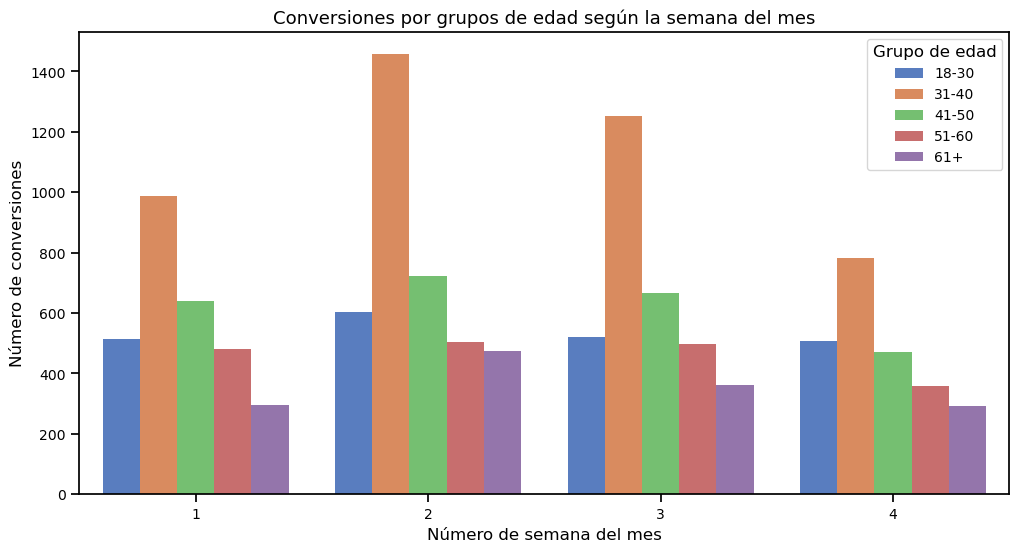

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Crear segmentos de edad
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df_marketing['age_group'] = pd.cut(df_marketing['age'], bins=bins, labels=labels, right=False)

# Filtrar solo las conversiones exitosas (suponiendo que 'deposit' == 1 indica una conversión exitosa)
df_converted = df_marketing[df_marketing['deposit'] == 1]

# Agrupar por semana del mes y grupo de edad, y contar las conversiones
df_age_conversion = df_converted.groupby(['semana_mes', 'age_group']).size().reset_index(name='counts')

# Mostrar los resultados en una tabla
print(df_age_conversion)

# Crear un gráfico de barras para visualizar las conversiones por grupo de edad y semana del mes
sns.barplot(x='semana_mes', y='counts', hue='age_group', data=df_age_conversion, palette='muted')
plt.title("Conversiones por grupos de edad según la semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de conversiones")
plt.legend(title="Grupo de edad")
plt.show()


 ## Dominio del Grupo de Edad 31-40 en Todas las Semanas:

 ##  1.  El grupo de edad de 31 a 40 años (barras naranjas) es claramente el que realiza más conversiones en todas las semanas del mes, con un pico significativo en la semana 2 donde supera las 1,400 conversiones.
    Posible Explicación: Este grupo etario puede ser más receptivo a las campañas o tener mayor disposición financiera durante todo el mes. Además, es probable que las personas en este rango de edad estén en una fase estable en términos de ingresos y gastos, lo que podría explicar su mayor tasa de conversiones.

## 2. Estabilidad Relativa de los Grupos 18-30 y 41-50:

    Los grupos de edad 18-30 (barras azules) y 41-50 (barras verdes) muestran un comportamiento más constante en todas las semanas, con ligeras variaciones pero sin grandes picos o caídas.
    Grupo 18-30: Aunque no tienen el mismo número de conversiones que los de 31-40, su número de conversiones es relativamente consistente, lo que podría indicar que este grupo responde de manera similar a lo largo del mes. Este grupo podría tener patrones de comportamiento más predecibles y responder de manera equilibrada a lo largo del mes.
    Grupo 41-50: Este grupo también muestra un comportamiento bastante constante, lo que sugiere que puede no estar tan influenciado por las fluctuaciones semanales.

## 3. Descenso del Grupo 51-60 en la Semana 4:

    El grupo de edad 51-60 (barras moradas) muestra una disminución significativa en la semana 4. Esto podría indicar que los clientes en este rango de edad son más propensos a convertir en las primeras tres semanas, pero tienen menos capacidad o disposición en la última semana.
    Posible Estrategia: Sería útil investigar si este grupo enfrenta más restricciones financieras o de tiempo en la última semana del mes, y si las campañas podrían ajustarse para mejorar la respuesta en esa semana (por ejemplo, ofreciendo descuentos o promociones que mitiguen esta caída).

## 4. Grupo 61+ con Actividad Limitada:

    El grupo de edad 61+ (barras violetas) es el que tiene el menor número de conversiones en todas las semanas, lo que puede ser indicativo de un menor interés o capacidad para convertir en general.
    Posible Explicación: Este grupo podría no estar tan interesado en las campañas o los productos ofrecidos, o podría tener barreras financieras o tecnológicas que limiten su participación. Sería interesante analizar si los mensajes o las estrategias de contacto deberían ajustarse específicamente para este grupo para aumentar su respuesta.

## 5. Pico de Conversiones en la Semana 2:

    Al igual que vimos en otros gráficos, la semana 2 muestra un pico en las conversiones, especialmente en el grupo de 31-40 años. Esto refuerza la idea de que las campañas en esta semana son particularmente efectivas. Es posible que los esfuerzos de marketing o las circunstancias externas (como los ciclos de pago) estén alineados con este comportamiento.

## 6. Caída General en la Semana 4:

    Se observa una caída general en la semana 4 en casi todos los grupos de edad, con una disminución notable en el grupo de 51-60 años. Esto podría deberse a factores financieros (menos fondos disponibles) o menor disposición a participar en campañas hacia el final del mes.
    Posible Estrategia: Podrías ajustar las campañas en esta semana con mensajes más atractivos o accesibles para contrarrestar esta caída.

## Resumen de Estrategias:

    Enfoque en el Grupo de 31-40: Dado que este grupo lidera las conversiones en todas las semanas, podrías continuar invirtiendo esfuerzos en este segmento, pero asegurarte de que las campañas en la semana 2 sean especialmente agresivas para aprovechar el pico de actividad.

    Fortalecer la Semana 4: Dado que hay una caída general en la semana 4, podrías ajustar las campañas para que sean más atractivas y accesibles para los clientes en esa semana. Esto podría incluir ofertas o incentivos adicionales para mantener el interés y aumentar las conversiones.

    Segmentación por Edad en la Semana 4: El grupo de edad 51-60 muestra una caída marcada en la semana 4, por lo que sería útil personalizar las campañas para este grupo con mensajes específicos que respondan a sus necesidades o limitaciones en esa parte del mes.

## Conclusión:

El comportamiento de las conversiones varía significativamente entre los grupos de edad y a lo largo del mes, con el grupo de 31-40 mostrando el mayor nivel de actividad. La semana 2 es la más efectiva en términos generales, mientras que la semana 4 presenta una caída que podría mitigarse con ajustes en las estrategias de marketing y comunicación.

# Conversiones según días desde el último contacto y semana del mes

    semana_mes           pdays_group  counts
0            1   Reciente (0-7 días)      17
1            1  Moderado (8-30 días)      18
2            1    Antiguo (31+ días)    1028
3            2   Reciente (0-7 días)       0
4            2  Moderado (8-30 días)       3
5            2    Antiguo (31+ días)    1576
6            3   Reciente (0-7 días)       0
7            3  Moderado (8-30 días)       9
8            3    Antiguo (31+ días)     956
9            4   Reciente (0-7 días)       7
10           4  Moderado (8-30 días)      20
11           4    Antiguo (31+ días)     799


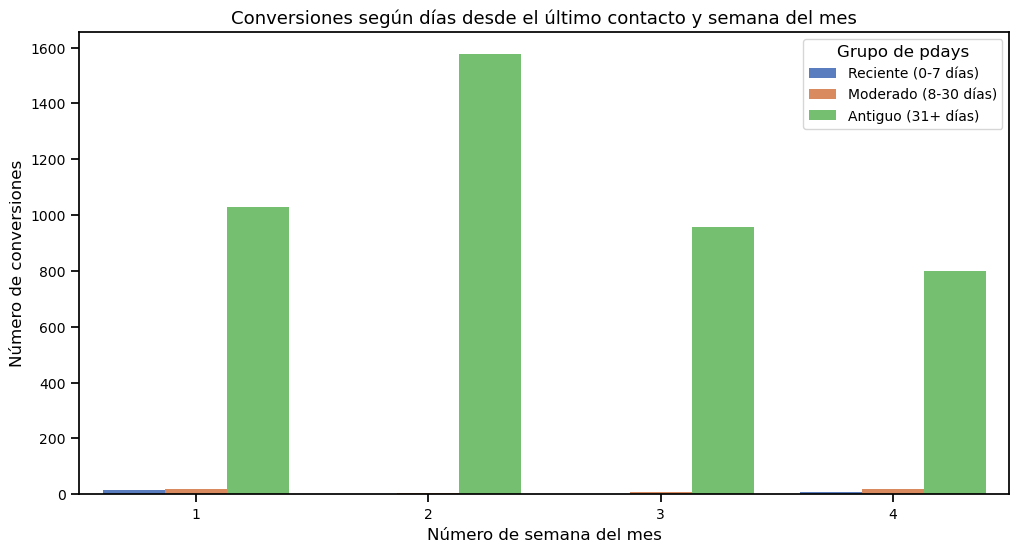

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Crear segmentos de pdays (por ejemplo: contacto reciente, moderado y antiguo)
bins = [-1, 7, 30, 999]  # El valor -1 significa que no fueron contactados previamente
labels = ['Reciente (0-7 días)', 'Moderado (8-30 días)', 'Antiguo (31+ días)']
df_marketing['pdays_group'] = pd.cut(df_marketing['pdays'], bins=bins, labels=labels)

# Filtrar solo las conversiones exitosas (donde 'deposit' == 1)
df_converted = df_marketing[df_marketing['deposit'] == 1]

# Agrupar por semana del mes y grupo de pdays, y contar las conversiones
df_pdays_conversion = df_converted.groupby(['semana_mes', 'pdays_group']).size().reset_index(name='counts')

# Mostrar los resultados en una tabla
print(df_pdays_conversion)

# Crear un gráfico de barras para visualizar las conversiones por pdays y semana del mes
sns.barplot(x='semana_mes', y='counts', hue='pdays_group', data=df_pdays_conversion, palette='muted')
plt.title("Conversiones según días desde el último contacto y semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de conversiones")
plt.legend(title="Grupo de pdays")
plt.show()


## 1. Dominio del Grupo de Contacto Antiguo (31+ días):

    El grupo de clientes que fueron contactados hace más de 31 días (barras verdes) domina las conversiones en todas las semanas del mes.
    Posible Explicación: Esto podría indicar que los clientes que no han sido contactados recientemente son más receptivos cuando finalmente se les vuelve a contactar. Tal vez estos clientes tienen más tiempo para reflexionar sobre las ofertas, lo que les permite tomar decisiones más informadas.
    Estrategia Potencial: Podría ser beneficioso enfocar campañas de recontacto en clientes que han estado inactivos por períodos prolongados, ya que parecen tener una mayor propensión a convertir.

## 2. Bajo Impacto del Contacto Reciente (0-7 días):

    El grupo de contacto reciente (0-7 días, barras azules) tiene un impacto muy bajo en las conversiones a lo largo del mes.
    Posible Explicación: Los clientes que fueron contactados recientemente podrían no estar listos para convertir tan rápidamente, o el contacto repetido en un corto periodo de tiempo puede no ser tan efectivo para este grupo.
    Estrategia Potencial: Es posible que para este grupo el contacto frecuente necesite un enfoque diferente, como un mensaje más suave o personalizado que no genere presión. Además, extender el tiempo de seguimiento puede ser más beneficioso.

## 3. Moderado Impacto de los Contactos entre 8-30 días:

    El grupo de clientes que fueron contactados entre 8 y 30 días atrás (barras naranjas) también muestra un impacto bajo en las conversiones, aunque algo mayor que el grupo reciente.
    Posible Explicación: Estos clientes pueden no sentir la urgencia para convertir en este periodo, pero su nivel de receptividad es ligeramente mayor que el de los contactados en los últimos 7 días.
    Sugerencia: Podrías ajustar las estrategias para este grupo, ofreciendo incentivos adicionales o recordatorios más enfocados a aquellos que no han convertido en el primer contacto.

## 4. Pico de Conversiones en la Semana 2 para el Grupo Antiguo:

    El número de conversiones para el grupo de contacto antiguo alcanza su punto máximo en la semana 2, con más de 1,500 conversiones.
    Posible Explicación: Esto refuerza el patrón que hemos observado en gráficos anteriores, donde la semana 2 parece ser la más efectiva para muchas métricas, incluidas las conversiones. Los clientes contactados hace más de 31 días podrían estar más receptivos en este momento, coincidiendo con factores externos como fechas de pago, planificación financiera, o mayor disposición para tomar decisiones importantes en la segunda semana del mes.
    Estrategia Potencial: Sería útil intensificar los esfuerzos de recontacto con el grupo de clientes antiguos en la semana 2, dado que parecen estar más dispuestos a convertir durante este periodo.

## 5. Decaída General en la Semana 4 para el Grupo Antiguo:

    Aunque el grupo de clientes antiguos sigue dominando las conversiones en la semana 4, el número total de conversiones disminuye en comparación con las semanas 2 y 3.
    Posible Explicación: La semana 4 ya ha mostrado en gráficos anteriores una caída en muchas métricas de rendimiento. Esto podría indicar que los clientes tienen menos disponibilidad financiera o que, al final del mes, su interés o capacidad de conversión disminuye.
    Estrategia Potencial: Es posible que se necesiten ofertas o incentivos adicionales en la semana 4 para este grupo, como descuentos o promociones que incentiven a los clientes que han estado inactivos por mucho tiempo a convertir antes de que termine el mes.

## Resumen de Estrategias:

    Enfocar Campañas en Clientes Antiguos (31+ días): El grupo de clientes que ha pasado más tiempo sin contacto es el más receptivo a las campañas, por lo que se deberían priorizar estrategias de recontacto para este grupo, especialmente en la semana 2.

    Revisar la Estrategia para Contactos Recientes (0-7 días): Los clientes que han sido contactados recientemente convierten mucho menos. Es probable que una estrategia más sutil, con un enfoque menos intrusivo y más orientado a mantener el contacto sin presionar, sea más efectiva.

    Refuerzo en la Semana 4: Aunque el grupo de contacto antiguo sigue dominando, las conversiones caen en la semana 4. Asegurarse de que en esta semana se implementen estrategias específicas, como incentivos o promociones especiales, podría ayudar a mantener el interés y aumentar las conversiones.

## Conclusión:

Este análisis resalta la importancia del tiempo desde el último contacto en las conversiones. Los clientes que han estado inactivos por más tiempo parecen ser los más propensos a convertir, especialmente en la semana 2. En cambio, los clientes contactados recientemente no muestran la misma receptividad. Ajustar las estrategias para maximizar el impacto en los clientes antiguos y suavizar el enfoque para los clientes recientes podría mejorar significativamente los resultados.

# Conversiones según el resultado anterior de la campaña (sin 'unknown')

    semana_mes poutcome  counts
0            1  failure     394
1            1    other     143
2            1  success     523
3            2  failure     507
4            2    other     205
5            2  success     867
6            3  failure     309
7            3    other     197
8            3  success     459
9            4  failure     260
10           4    other     152
11           4  success     410


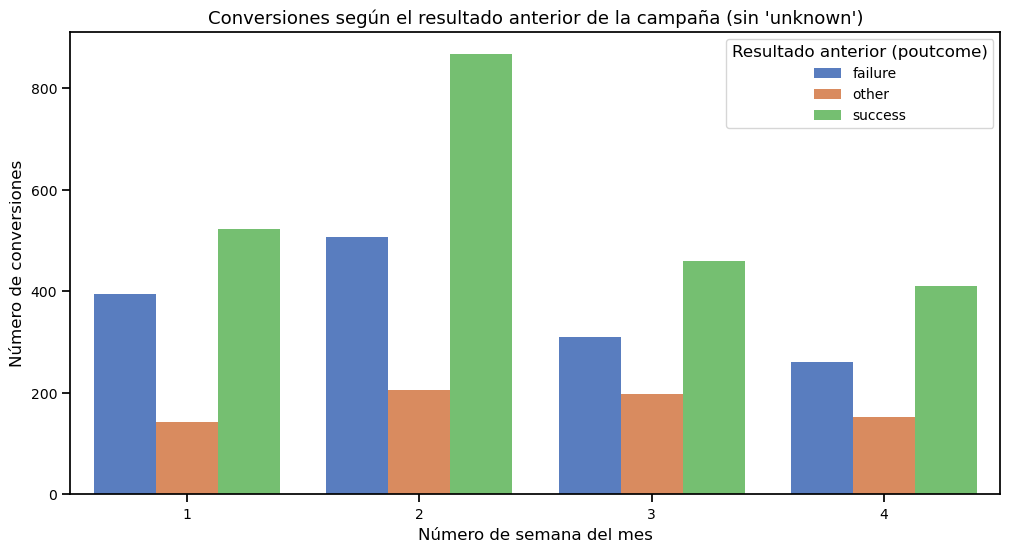

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Filtrar solo las conversiones exitosas (donde 'deposit' == 1) y excluir los 'unknown' en poutcome
df_filtered = df_marketing[(df_marketing['deposit'] == 1) & (df_marketing['poutcome'] != 'unknown')]

# Agrupar por semana del mes y resultado anterior ('poutcome')
df_resultado_anterior = df_filtered.groupby(['semana_mes', 'poutcome']).size().reset_index(name='counts')

# Mostrar los resultados en una tabla
print(df_resultado_anterior)

# Crear un gráfico de barras para visualizar las conversiones según el resultado anterior y la semana del mes
sns.barplot(x='semana_mes', y='counts', hue='poutcome', data=df_resultado_anterior, palette='muted')
plt.title("Conversiones según el resultado anterior de la campaña (sin 'unknown')")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de conversiones")
plt.legend(title="Resultado anterior (poutcome)")
plt.show()



## 1. Dominio de Conversiones en la Semana 2 Tras Éxito en la Campaña Anterior:

    El número de conversiones es significativamente más alto en la semana 2 para aquellos clientes que tuvieron un resultado exitoso en la campaña anterior (barras verdes), superando las 800 conversiones.
    Posible Explicación: Esto sugiere que los clientes que ya tuvieron éxito en campañas anteriores son más propensos a convertir en la segunda semana del mes, posiblemente debido a un refuerzo de confianza o una predisposición a participar nuevamente tras un resultado exitoso.

## 2. Conversión Moderada Tras Fallos en Campañas Anteriores:

    Las conversiones de clientes que tuvieron fallo en la campaña anterior (barras azules) son consistentes pero no muy altas en todas las semanas, aunque se observa un ligero aumento en las semanas 2 y 3.
    Posible Explicación: Los clientes que fallaron en una campaña previa aún pueden ser recuperados, aunque sus tasas de conversión son notablemente más bajas en comparación con aquellos que tuvieron éxito. Este patrón indica que, aunque haya un fracaso en una campaña anterior, sigue existiendo una posibilidad de reactivación, especialmente en las semanas 2 y 3.

## 3. Importancia del Resultado "Other":

    El resultado "other" (barras naranjas) parece tener un impacto constante, pero menor, en todas las semanas del mes.
    Posible Explicación: Aunque los resultados no específicos o ambiguos tienen un impacto moderado en las conversiones, su presencia es constante, lo que podría significar que estos clientes aún son valiosos, pero puede ser necesario ajustar el enfoque de contacto para mejorar las tasas de conversión.

## 4. Caída General en la Semana 4:

    Las conversiones en la semana 4 son menores en comparación con la semana 2, independientemente del resultado anterior. Esto refuerza el patrón que hemos observado en gráficos anteriores, donde la semana 4 tiende a ser menos productiva en términos de conversiones.
    Posible Estrategia: Dado que la semana 4 tiende a mostrar una disminución general, sería beneficioso ajustar las campañas para esta semana, ofreciendo incentivos adicionales o reduciendo la intensidad del contacto con clientes que no han respondido positivamente a campañas anteriores.

## 5. Consistencia en Conversiones Tras Resultados Exitosos:

    A lo largo de las semanas, los clientes que tuvieron un resultado exitoso en campañas anteriores (barras verdes) siempre son los que convierten en mayor número, incluso en la semana 4.
    Estrategia Potencial: Aprovechar esta consistencia enviando campañas más agresivas o personalizadas a los clientes con un historial de éxito en la semana 2 y asegurarse de mantener el seguimiento en las semanas posteriores para capitalizar sobre su mayor disposición a convertir.

## Resumen de Estrategias:

    Aprovechar la Semana 2 con Clientes Exitosos Anteriormente: Dado que los clientes con resultados exitosos en campañas anteriores convierten de manera significativa en la semana 2, es importante diseñar campañas dirigidas a estos clientes en este momento clave del mes para maximizar las conversiones.

    Reactivar Clientes que Fallaron Anteriormente: Aunque las conversiones tras un fallo en campañas anteriores son más bajas, aún hay una oportunidad de conversión, especialmente en las semanas 2 y 3. Estrategias como ofertas especiales o mensajes de recuperación podrían mejorar las tasas de conversión para este grupo.

    Mejorar la Conversión en la Semana 4: Las campañas en la semana 4 muestran una disminución general, por lo que sería útil ajustar las estrategias para mantener el interés de los clientes. Podrían ofrecerse incentivos adicionales o promociones para aumentar la conversión en este período.

## Conclusión:

El resultado anterior de la campaña tiene un impacto claro en las conversiones actuales. Los clientes que han tenido éxito en campañas anteriores muestran una alta probabilidad de conversión, especialmente en la semana 2, mientras que aquellos con resultados fallidos aún pueden ser recuperados, aunque en menor medida. La semana 4 sigue siendo un desafío, por lo que ajustar las estrategias para esta semana es clave para mejorar los resultados generales.

## Conversiones según el rango de llamadas en la campaña y semana del mes

C:\Users\Gman\AppData\Local\Temp\ipykernel_21080\1154292452.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_converted['campaign_range'] = pd.cut(df_converted['campaign'], bins=bins, labels=labels, right=False)


    semana_mes campaign_range  counts
0            1            0-4    2781
1            1            5-9     121
2            1          10-14      11
3            1          15-19       4
4            1          20-24       0
5            1          25-29       0
6            1          30-34       0
7            2            0-4    3508
8            2            5-9     237
9            2          10-14       7
10           2          15-19       2
11           2          20-24       2
12           2          25-29       0
13           2          30-34       3
14           3            0-4    3028
15           3            5-9     216
16           3          10-14      51
17           3          15-19       7
18           3          20-24       1
19           3          25-29       0
20           3          30-34       0
21           4            0-4    2161
22           4            5-9     189
23           4          10-14      40
24           4          15-19      18
25          

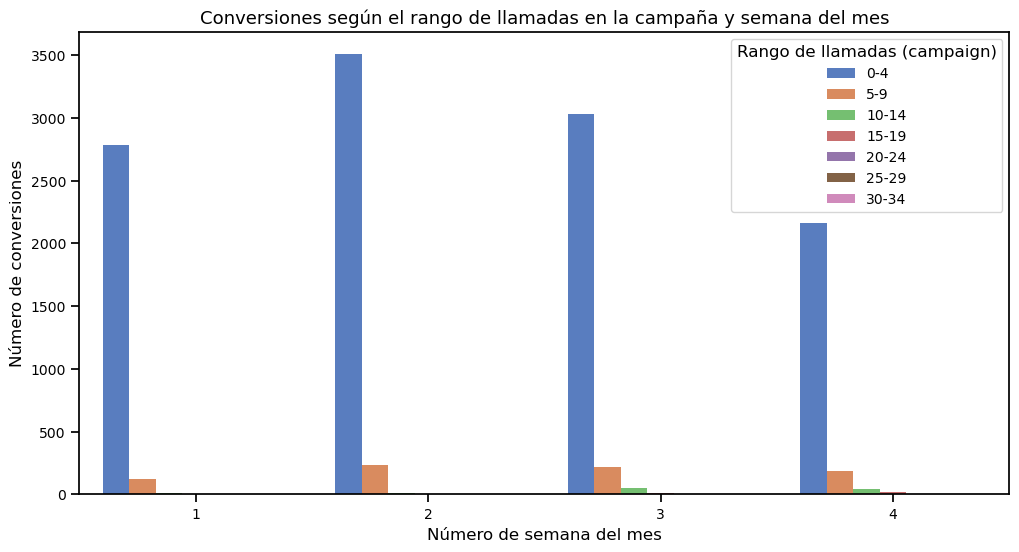

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongo que ya tienes tu dataframe llamado df_marketing

# Filtrar solo las conversiones exitosas (donde 'deposit' == 1)
df_converted = df_marketing[df_marketing['deposit'] == 1]

# Crear rangos de 5 en 5 para el número de llamadas ('campaign')
bins = range(0, df_converted['campaign'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df_converted['campaign_range'] = pd.cut(df_converted['campaign'], bins=bins, labels=labels, right=False)

# Agrupar por semana del mes y rango de llamadas en la campaña
df_numero_llamadas = df_converted.groupby(['semana_mes', 'campaign_range']).size().reset_index(name='counts')

# Mostrar los resultados en una tabla
print(df_numero_llamadas)

# Crear un gráfico de barras para visualizar las conversiones según el rango de llamadas y la semana del mes
sns.barplot(x='semana_mes', y='counts', hue='campaign_range', data=df_numero_llamadas, palette='muted')
plt.title("Conversiones según el rango de llamadas en la campaña y semana del mes")
plt.xlabel("Número de semana del mes")
plt.ylabel("Número de conversiones")
plt.legend(title="Rango de llamadas (campaign)")
plt.show()


## 1. Dominio del Rango de Llamadas 0-4:

    El rango 0-4 llamadas (barras azules) domina claramente en todas las semanas del mes, con la mayoría de las conversiones ocurriendo en este rango. En cada semana, este grupo supera las 2,500 conversiones, alcanzando más de 3,500 conversiones en la semana 2.
    Posible Explicación: Esto sugiere que la mayoría de los clientes convierten después de un número relativamente bajo de llamadas. Los primeros intentos de contacto parecen ser los más efectivos para lograr la conversión.
    Estrategia Potencial: Concentrar los esfuerzos en los primeros 4 intentos de contacto parece ser la estrategia más efectiva. Podría ser útil optimizar la calidad de estos primeros contactos, en lugar de realizar demasiados intentos, ya que las conversiones caen rápidamente después de 5 llamadas.

## 2. Conversión Moderada con 5-9 Llamadas:

    El siguiente rango más común es 5-9 llamadas (barras naranjas), aunque el número de conversiones en este rango es significativamente menor que en el rango de 0-4 llamadas. Aún así, se observa que sigue habiendo algunas conversiones tras un mayor número de intentos, pero no de manera significativa.
    Posible Explicación: Las conversiones disminuyen drásticamente después de 4 intentos. Este grupo muestra que, aunque algunos clientes convierten tras más intentos, la efectividad cae rápidamente después del cuarto intento de contacto.
    Sugerencia: Podrías continuar realizando hasta 9 intentos de contacto en los casos donde los clientes no respondan a los primeros intentos, pero deberías evaluar si es rentable continuar con tantos intentos para obtener resultados limitados.

## 3. Poca Conversión Tras Más de 10 Llamadas:

    Los rangos de llamadas 10-14 (barras verdes) y superiores tienen una cantidad muy baja de conversiones, y esto se mantiene en todas las semanas del mes.
    Posible Explicación: Estos datos indican que la fatiga de llamadas probablemente comienza a afectar después de un cierto número de intentos. Los clientes que requieren más de 10 intentos de contacto tienen una probabilidad muy baja de conversión.
    Estrategia Potencial: Después de 10 intentos de contacto, la rentabilidad de continuar con el contacto parece ser muy baja. Podrías establecer un límite de intentos y reducir esfuerzos en clientes que requieren más de 10 llamadas, redirigiendo esos recursos a nuevos prospectos.

## 4. Patrón General Consistente en Todas las Semanas:

    El patrón de conversión es bastante consistente en todas las semanas del mes: los clientes que convierten lo hacen generalmente con un bajo número de intentos de contacto (0-4), y las conversiones se reducen significativamente después de 5 intentos. Esto sugiere que el número óptimo de intentos de contacto no varía mucho entre semanas.
    Sugerencia: Dado que el patrón es similar a lo largo del mes, podrías optimizar el contacto temprano en cada semana, sabiendo que la probabilidad de conversión disminuye considerablemente después del cuarto intento.

## 5. Pico de Conversiones en la Semana 2:

    El mayor número de conversiones ocurre en la semana 2 en todos los rangos de llamadas, aunque esto es especialmente evidente en el rango de 0-4 llamadas.
    Posible Explicación: Como se ha observado en otros gráficos, la semana 2 parece ser un período clave para lograr conversiones. Podría estar relacionado con factores externos, como ciclos de pago, lo que hace que los clientes estén más predispuestos a convertir en esta semana.
    Sugerencia: Podrías concentrar esfuerzos adicionales en la semana 2 para aprovechar esta tendencia, especialmente en los clientes que han recibido entre 0 y 4 llamadas, donde la tasa de éxito es más alta.

## Resumen de Estrategias:

    Optimización de Contacto Temprano: Dado que la gran mayoría de las conversiones ocurre después de 0-4 llamadas, es fundamental concentrar recursos en maximizar la efectividad de estos primeros contactos. Podrías mejorar los guiones, ofrecer incentivos en las primeras llamadas o ajustar el tiempo de seguimiento entre cada intento de contacto.

    Reducir el Número de Intentos para Mejores Resultados: El gráfico muestra que el retorno de las llamadas adicionales después del cuarto intento disminuye considerablemente. Limitar el número de intentos a 5-9 podría ser una estrategia eficiente para evitar la fatiga de los clientes y optimizar los recursos de contacto.

    Maximizar Esfuerzos en la Semana 2: La semana 2 sigue siendo la más fructífera en cuanto a conversiones. Aprovecha este momento clave con campañas más agresivas o personalizadas, especialmente en los primeros intentos de contacto, donde el impacto es mayor.

## Conclusión:

El análisis muestra que la mayoría de las conversiones se logran dentro de los primeros 4 intentos de contacto, y que después de 5-9 llamadas, la probabilidad de éxito cae significativamente. La semana 2 sigue destacándose como el mejor momento para realizar conversiones, lo que sugiere que concentrar los esfuerzos en los primeros contactos durante esta semana podría maximizar los resultados.